# Annotating 2D Molecular Structures Using RDKit 
## Introduction
This program is meant to use IOData to parse a 'fchk' input file for atoms and atomic charges, then use RDKit to visualize the molecule in question and output as a png file. RDKit will also colorize in accordance to atomic charges
 

## Dependencies

1. We need to load dependencies for both IOData and RDKit

2. IOData requires a means to load an input file "input" using `load_one`, and output a 'sdf' file using `dump_one`,

3. RDKit is modular, and requires specific modules for certain tasks. IE. when we want to manipulate a chemical, we need RDKit to import Chem/AllChem, and then individually import necessary submodules such as `PeriodicTable`

Below are the dependencies


In [109]:

from iodata import load_one, dump_one 
from iodata import iodata
'''
from iodata import formats 
from iodata.formats import sdf
from iodata import formats 
from iodata.formats import sdf
from iodata.formats.sdf import dump_one 
'''

from rdkit import Chem
from rdkit.Chem import AllChem 
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import MolToImage
from rdkit.Chem import rdMolTransforms 
from rdkit.Chem import PeriodicTable
from rdkit.Chem import rdmolfiles
from rdkit.Chem.Draw import DrawingOptions

from IPython.display import Image


## Manipulate Our Input

We need to load our input using the afforementioned `load_one` and save to 'sdf' using `dump_one`

### IOData manipulation 
After loading and saving, we want to manipulate the loaded input file 'loadInput'

1. We want to create a key : value dictionary, dictCharges, of our atomic charges, accomplished using the atcharges API call 

### RDKit Manipulation

1. Working with our saved output file, we want to read it using RDKit, accomplished by `Chem.MolFromMolFile()`

2. We can create an additional key : value dictionary tabulating our atomic numbers and atoms, accomplished by establishing a for loop for `GetAtoms()` then iterating through each atom.

3. We can also examine our readed 'sdf' file by running `Chem.MolToSmiles()` 


In [110]:
input = 'acrolein_q+0.fchk'
loadInput = load_one(input)
dump_one(loadInput,'acrolein.sdf')

for key, value in loadInput.atcharges.items():
    dictCharges = f"{key[0:]} {value[0:]}" 
    print(dictCharges)

readFile = Chem.MolFromMolFile('acrolein.sdf')

print(" ")
print("Atomic Numbers of Individual Atoms: ")
for m in readFile.GetAtoms():
    dictAtom = f"{m.GetAtomicNum()} {m.GetSymbol()}" 
    print(dictAtom)
    
    # THIS IS DIAGNOSTIC, I AM NOT SURE WHY DUMP_ONE OR RDKIT IS FAILING TO PRESERVE BONDS OR HOW TO RECONSTRUCT THE BONDS
smiles = Chem.MolToSmiles(readFile)
molTemp = smiles.replace(".","")
print(smiles)
print(molTemp)
test = Chem.MolFromSmiles(molTemp)
print(test)

mulliken [-0.48356702  1.21850493  0.70394801  0.64173068 -0.65568545 -0.36909143
 -0.49770781 -0.55813191]
esp [-0.47309653 -0.16880218  0.49252442 -0.35304122  0.14979923 -0.00819151
  0.19343217  0.16737561]
npa [-0.54651148 -0.31660749  0.39734959 -0.3321443   0.23668159  0.12814813
  0.22080404  0.21227993]
 
Atomic Numbers of Individual Atoms: 
8 O
6 C
6 C
6 C
1 H
1 H
1 H
1 H
C.C.C.O.[HH].[HH].[HH].[HH]
CCCO[HH][HH][HH][HH]
None


## Visualization using RDKit
Now we want to save our image and view, accomplished using `Draw.MolToImage()` 

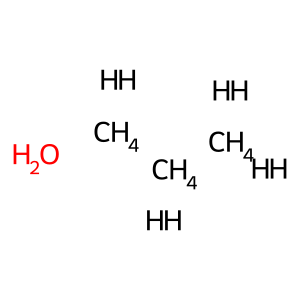

In [111]:
img = Draw.MolToImage(readFile)

#img = MolToImage(smile, size=(400, 400),fitImage=True)
img